<a href="https://colab.research.google.com/github/Muhammed-Shaahidh/Heart_Attack_Prediction/blob/master/Notebooks/IT24102659_Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
age: 0 outliers


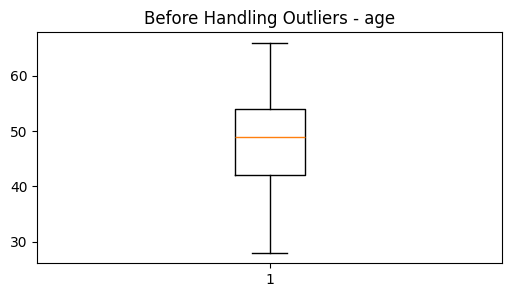

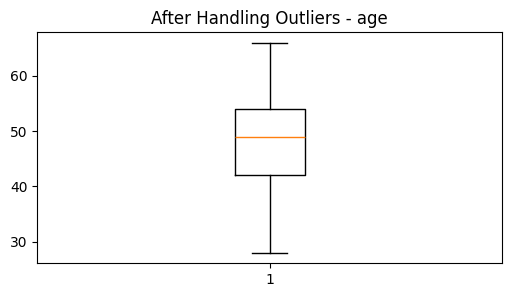

sex: 0 outliers


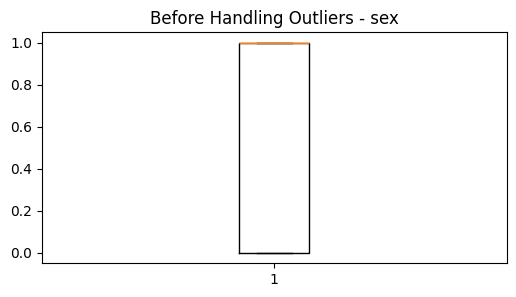

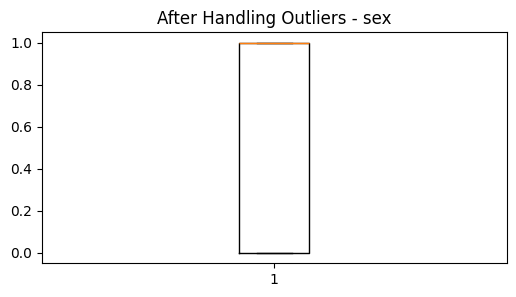

cp: 0 outliers


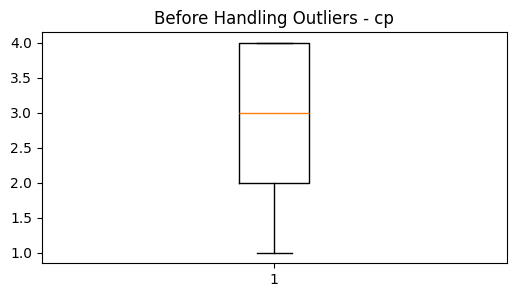

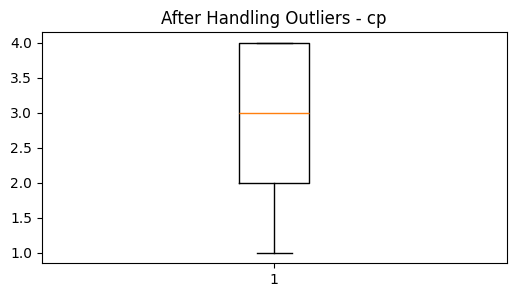

oldpeak: 11 outliers


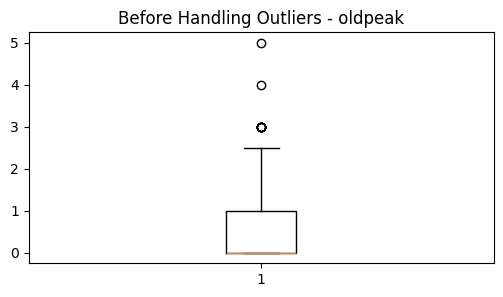

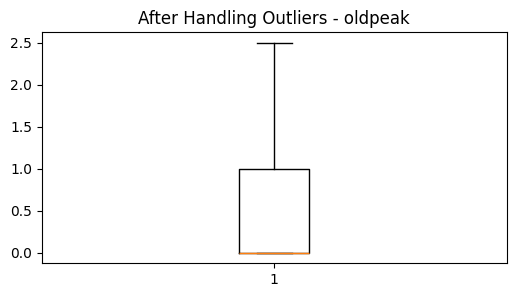

num       : 0 outliers


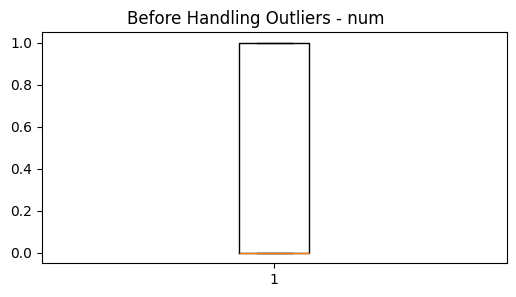

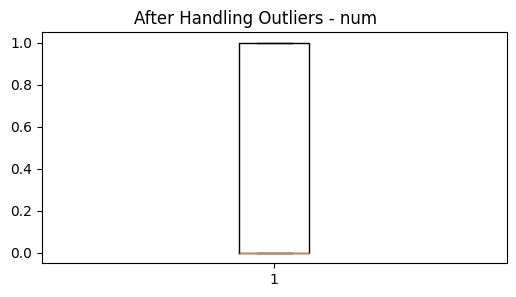

✅ Outlier handling complete. Cleaned file saved as 'data_outliers_handled.csv'


In [5]:
#Member 2 (IT24102659 Senevirathna K.S.D.B)– Handling Outliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset
url = "https://raw.githubusercontent.com/Muhammed-Shaahidh/Heart_Attack_Prediction/refs/heads/master/Data/data.csv"
f1 = pd.read_csv(url)

# Display first few rows of the dataset
print(f1.head())
# Detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Handle outliers by capping (winsorization)
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Loop through numeric columns
for col in f1.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(f1, col)
    print(f"{col}: {len(outliers)} outliers")

    # Boxplot before handling
    plt.figure(figsize=(6,3))
    plt.title(f"Before Handling Outliers - {col}")
    plt.boxplot(f1[col])
    plt.show()

    # Handle outliers
    f1 = cap_outliers(f1, col)

    # Boxplot after handling
    plt.figure(figsize=(6,3))
    plt.title(f"After Handling Outliers - {col}")
    plt.boxplot(f1[col])
    plt.show()

# Save dataset after outlier handling
f1.to_csv('data_outliers_handled.csv', index=False)

print("✅ Outlier handling complete. Cleaned file saved as 'data_outliers_handled.csv'")